In [104]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [177]:
df=pd.read_csv("customer_churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [106]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [107]:
df.drop('customerID',axis=1,inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Datatype conversion

In [109]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [110]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [111]:
df.shape

(7043, 20)

In [121]:
df1 = df[df.TotalCharges !=' ']

In [122]:
df1.shape

(7032, 20)

In [123]:
df1.TotalCharges.dtypes

dtype('O')

In [125]:
df1['TotalCharges'] = pd.to_numeric(df1.TotalCharges)

C:\Users\saras\AppData\Local\Temp\ipykernel_8500\2039512902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1.TotalCharges)


In [126]:
df1.TotalCharges.dtypes

dtype('float64')

#### EDA

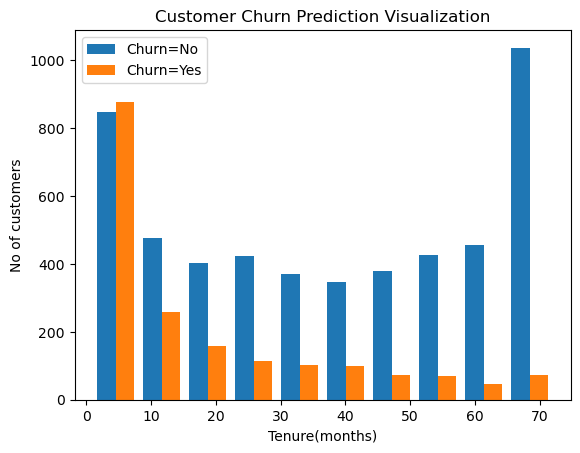

In [136]:
tenure_churn_No = df1[df1.Churn=='No'].tenure
tenure_churn_Yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel('Tenure(months)')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_No,tenure_churn_Yes],label=['Churn=No','Churn=Yes'])
plt.legend()

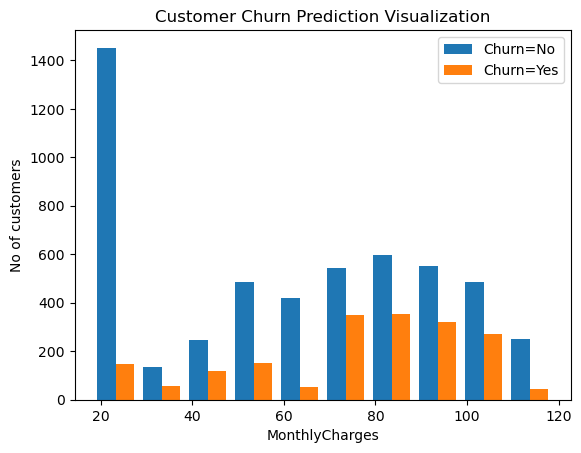

In [137]:
monthlycharges_churn_No = df1[df1.Churn=='No'].MonthlyCharges
monthlycharges_churn_Yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([monthlycharges_churn_No,monthlycharges_churn_Yes],label=['Churn=No','Churn=Yes'])
plt.legend()

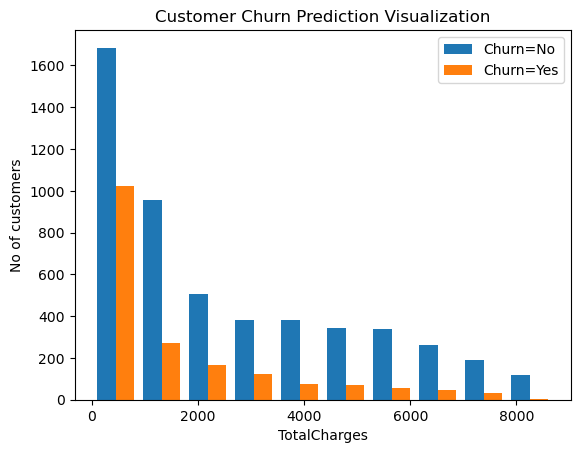

In [138]:
Totalcharges_churn_No = df1[df1.Churn=='No'].TotalCharges
Totalcharges_churn_Yes = df1[df1.Churn=='Yes'].TotalCharges
plt.xlabel('TotalCharges')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([Totalcharges_churn_No,Totalcharges_churn_Yes],label=['Churn=No','Churn=Yes'])
plt.legend()

In [147]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [148]:
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Converting Categorical values 

In [151]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


C:\Users\saras\AppData\Local\Temp\ipykernel_8500\1630994789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\saras\AppData\Local\Temp\ipykernel_8500\1630994789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [155]:
yes_no_columns = ['Churn','PaperlessBilling','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity',
                  'MultipleLines','PhoneService','Dependents','Partner']

In [156]:
for col in yes_no_columns:
    df1[col].replace({
        'Yes':1,
        'No':0
    },inplace=True)

C:\Users\saras\AppData\Local\Temp\ipykernel_8500\2530482254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({


In [160]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [161]:
df1.replace({'Female':1,'Male':0},inplace=True)

C:\Users\saras\AppData\Local\Temp\ipykernel_8500\1354560788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'Female':1,'Male':0},inplace=True)


#### One hot Encoding

In [175]:
df2 = pd.get_dummies(data=df1,columns=['Contract','PaymentMethod','InternetService'])
df2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0


#### Scaling

In [179]:
cols_to_scale= ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [180]:
df2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0


In [182]:
X= df2.drop('Churn',axis=1)
y= df2['Churn']

In [205]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5) 

In [186]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(26,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.5900 - accuracy: 0.6540
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7934
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8000
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8036
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8034
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8062
Epoch 7/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8091
Epoch 8/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8064
Epoch 9/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8091
Epoch 10/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8089

In [187]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7804


[0.4484991729259491, 0.7803837656974792]

In [188]:
y_predicted = model.predict(X_test)
y_predicted[:5]

array([[0.22549191],
       [0.43130273],
       [0.00689787],
       [0.7256677 ],
       [0.6417502 ]], dtype=float32)

In [197]:
np.round(model.predict(X_test))[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [189]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [191]:
y_pred=[]
for i in y_predicted:
    if i<.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [192]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [193]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.50      0.57       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(50.722222222222214, 0.5, 'Truth')

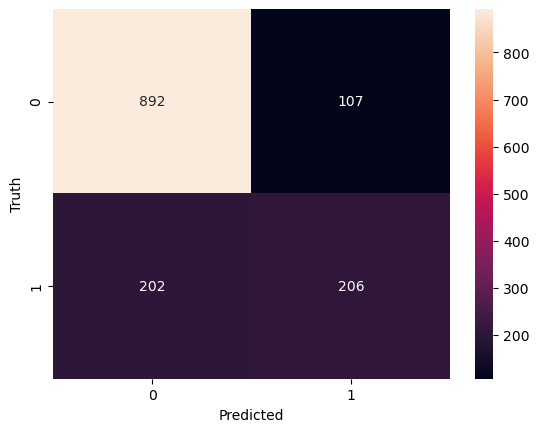

In [194]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [206]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(15,input_shape=(26,),activation='relu'),
        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss= loss,
        metrics=['accuracy']
    )
    if weights==-1:
        model.fit(X_train,y_train,epochs=50)
    else:
        model.fit(X_train,y_train,epochs=50,class_weight = weights) 
    
    print("Model_Evaluation:\n ",model.evaluate(X_test,y_test))
    y_pred = np.round(model.predict(X_test))
    print("Classification_report:\n",classification_report(y_test,y_pred))
    
    return y_pred

In [207]:
y_pred = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/50
165/165 [==============================] - 1s 1ms/step - loss: 0.5242 - accuracy: 0.7440
Epoch 2/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.7854
Epoch 3/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.7960
Epoch 4/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.7990
Epoch 5/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8039
Epoch 6/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8013
Epoch 7/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8053
Epoch 8/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8058
Epoch 9/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8074
Epoch 10/50
165/165 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8070

#### How to improve f1 score of imbalanced dataset


In [208]:
y_test.value_counts()

0    1267
1     491
Name: Churn, dtype: int64

In [209]:
X_train.shape

(5274, 26)

In [211]:
X_test.shape

(1758, 26)

In [212]:
df2.shape

(7032, 27)

1.Undersampling

In [216]:
count_class0,count_class1 = df2.Churn.value_counts()
df_class1= df2[df2['Churn']==1]
df_class0= df2[df2['Churn']==0]

In [217]:
df_class1.shape

(1869, 27)

In [218]:
df_class0.shape

(5163, 27)

In [220]:
df_class0_under= df_class0.sample(count_class1)
df_test_under = pd.concat([df_class0_under,df_class1],axis=0)
df_test_under.shape

(3738, 27)

In [221]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [224]:
X=df_test_under.drop('Churn',axis=1)
y=df_test_under['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5,stratify=y) 

In [225]:
y_train.value_counts()

0    1402
1    1401
Name: Churn, dtype: int64

In [226]:
y_pred = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/50
88/88 [==============================] - 1s 2ms/step - loss: 0.6194 - accuracy: 0.6750
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7389
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7478
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7528
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7563
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7549
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7560
Epoch 8/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7610
Epoch 9/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7656
Epoch 10/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7617
Epoch 11/50
88/88 [

f1 score for class 1 has improved when undersampled

2.Oversampling

In [228]:
df_class1.shape,df_class0.shape

((1869, 27), (5163, 27))

In [229]:
count_class0,count_class1

(5163, 1869)

In [232]:
df_class1.sample(count_class0,replace=True).shape

(5163, 27)

In [233]:
df_class1_over = df_class1.sample(count_class0,replace=True)
df_test_over = pd.concat([df_class1_over,df_class0],axis=0)
df_test_over.shape

(10326, 27)

In [234]:
df_test_over.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [236]:
X=df_test_over.drop('Churn',axis=1)
y=df_test_over['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5,stratify=y) 
y_pred = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/50
242/242 [==============================] - 1s 1ms/step - loss: 0.5890 - accuracy: 0.6915
Epoch 2/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7611
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.7689
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7670
Epoch 5/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7716
Epoch 6/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7729
Epoch 7/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7708
Epoch 8/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7708
Epoch 9/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7740
Epoch 10/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.7753

3. SMOTE

Creates new samples from current samples using KNN while oversampling just duplicates the current samples

In [237]:
X=df2.drop('Churn',axis=1)
y=df2.Churn

In [238]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [252]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\saras\anaconda3\lib\site-packages\imblearn\utils\_validation.py)

In [253]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy = 'minority')
X_sm,y_sm = smote.fit_sample(X,y)
y_sm.value_counts()

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\saras\anaconda3\lib\site-packages\imblearn\utils\_validation.py)